# Tool Calling Agent

> AI Agent가 답변 생성에 '도구의 도움을 받을 지 감지'하고, 도구 사용이 필요하다면 도구 호출 결과를 기반으로 답변하는 Agent

langchain에서 제공하는 여러 tool도 존재함 : [langchain-tools](https://python.langchain.com/docs/integrations/tools/)

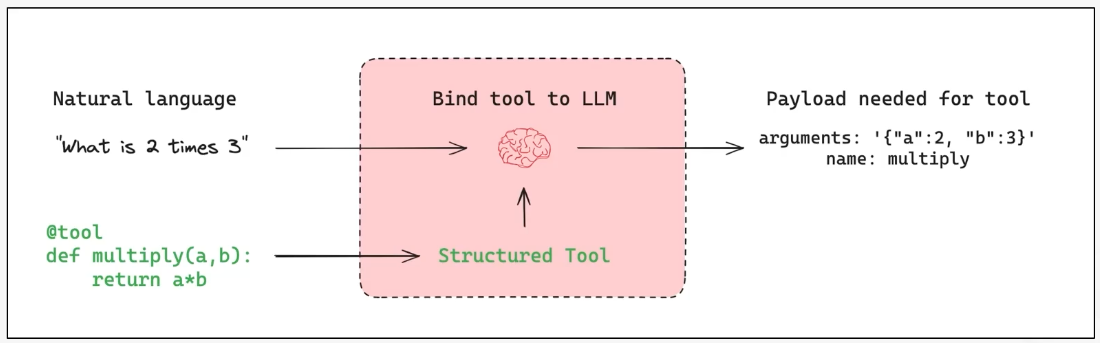
- llm에 tool 데코레이터로 정의함 tool 함수를 bind 해줄 수 있음.
- llm은 자연어 입력이 들어왔을 때, 입력된 자연어(사용자 입력)을 기반으로 본인이 가진 tool 중 어느 것을 사용할 지 감지하고, 해당 tool을 사용하기 위해서는 어떤 arguments를 사용해야하는 지 판단한다

## Import 

In [2]:
from dotenv import load_dotenv
import os
import json

from tavily import TavilyClient

from langchain_tavily import TavilySearch
from langchain_community.tools.tavily_search import TavilySearchResults

from langchain_core.tools import tool

from langchain_openai import ChatOpenAI

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage, ToolMessage, HumanMessage
from langgraph.prebuilt import ToolNode

from langgraph.graph import StateGraph, START, END

## Set Environment Valriables

In [3]:
env_path = os.path.join("..", "config", ".env")

load_dotenv(env_path)

True

## TavilySearch

In [11]:
tavily_client = TavilyClient()

### `search`

- arguments :
    - query
    - max_results
    - topic
    - days
- return : 
    - dict with related response fields

In [17]:
response = tavily_client.search("AI Agent가 뭐야?", max_results=3)

for key, val in response.items():
    print(f"{key} : ", end="")
    if type(val) is list :
        print()
        for content in val:
            print(content)
    else :
        print(val)

query : AI Agent가 뭐야?
follow_up_questions : None
answer : None
images : 
results : 
{'url': 'https://blog.naver.com/dxtrend/223732957973', 'title': 'AI에이전트(AI Agent)란 무엇인가? : 네이버 블로그', 'content': 'AI 에이전트는 특정 목표를 달성하기 위해 자율적으로 행동하고 결정을 내리는 지능형 시스템이다. 단순한 규칙 기반 로직을 넘어, 복잡한 계획, 추론,', 'score': 0.8961153, 'raw_content': None}
{'url': 'https://aws.amazon.com/ko/what-is/ai-agents/', 'title': 'AI 에이전트란 무엇인가요? - 인공 지능의 에이전트 설명 - AWS', 'content': 'AI 에이전트는 사람의 개입 없이 특정 작업을 수행하는 자율 지능형 시스템입니다. 조직에서는 AI 에이전트를 사용하여 특정 목표와 보다 효율적인 비즈니스 성과를 달성', 'score': 0.86136365, 'raw_content': None}
{'url': 'https://cloud.google.com/discover/what-are-ai-agents?hl=ko', 'title': 'AI 에이전트란 무엇인가요? 정의, 예시, 유형 - Google Cloud', 'content': 'AI 에이전트는 AI를 사용해 사용자를 대신하여 목표를 추구하고 태스크를 완료하는 소프트웨어 시스템입니다. AI 에이전트는 추론, 계획, 기억이 가능하며 일정 수준의 자', 'score': 0.8296166, 'raw_content': None}
response_time : 1.18


### `get_search_context`

- return :
    - str containing the content and sources of the results

In [18]:
context = tavily_client.get_search_context(query="AI Agent가 뭐야?")

print(context)

[{"url": "https://blog.naver.com/dxtrend/223732957973", "content": "AI \uc5d0\uc774\uc804\ud2b8\ub294 \ud2b9\uc815 \ubaa9\ud45c\ub97c \ub2ec\uc131\ud558\uae30 \uc704\ud574 \uc790\uc728\uc801\uc73c\ub85c \ud589\ub3d9\ud558\uace0 \uacb0\uc815\uc744 \ub0b4\ub9ac\ub294 \uc9c0\ub2a5\ud615 \uc2dc\uc2a4\ud15c\uc774\ub2e4. \ub2e8\uc21c\ud55c \uaddc\uce59 \uae30\ubc18 \ub85c\uc9c1\uc744 \ub118\uc5b4, \ubcf5\uc7a1\ud55c \uacc4\ud68d, \ucd94\ub860,"}, {"url": "https://www.cio.com/article/3619341/ai-%EC%97%90%EC%9D%B4%EC%A0%84%ED%8A%B8%EB%9E%80-%EB%84%88%EB%8F%84%EB%82%98%EB%8F%84-%EB%9B%B0%EC%96%B4%EB%93%9C%EB%8A%94-%EC%9D%B4%EC%9C%A0%EB%8A%94.html", "content": "AI \uc5d0\uc774\uc804\ud2b8(AI Agent)\ub294 \uc0dd\uc131\ud615 AI\uc758 \uc9c4\ud654\uc758 \ucd5c\uc2e0 \ub2e8\uacc4\ub85c, \uc778\uac04\uc758 \ud589\ub3d9\uc744 \ubaa8\ubc29\ud558\uace0 \uc790\uc728\uc801\uc73c\ub85c \uc791\uc5c5\uc744 \uc218\ud589\ud560 \uc218 \uc788\ub294 \uae30\uc220\uc744 \uc758\ubbf8\ud55c\ub2e4. \ub51c\ub85c\uc774\

### `qna_search`

- return: 
    - str, containing a short answer to the search query

In [19]:
answer = tavily_client.qna_search(query="AI Agent가 뭐야?")

print(answer)

An AI Agent is an autonomous AI system that can perform tasks and make decisions independently. It uses AI to achieve specific goals without human intervention. AI Agents can handle complex tasks and adapt to new situations.


## Use TavilySearch as a Tool in Langchain

[documents](https://python.langchain.com/docs/integrations/tools/tavily_search/)

- `max_results` (optional, int): 검색 결과 반환 수
- `topic` (optional, str): 검색 카테고리 / "general"(Default), "news", "finance"
- `include_answer` (optional, bool): 쿼리에 대한 답변 포함 여부
- `include_raw_content` (optional, bool): 결과 HTML 포함 여부
- `include_images` (optional, bool): 쿼리 관련 이미지 목록 포함 여부
- `include_image_descriptions` (optional, bool): 각 이미지에 대한 설명 텍스트 포함 여부
- `search_depth` (optional, str): 검색 깊이 / "basic"(Default),"advanced"
- `time_range` (optional, str): 필터링 날짜 범위 - "day", "week", "month", "year"
- `include_domains` (optional, List[str]): 구체적으로 포함할 도메인 목록
- `exclude_domains` (optional, List[str]): 구체적으로 제외할 도메인 목록

In [4]:
tool = TavilySearch(max_results=3)
tool.invoke("What's a 'node' in LangGraph?")

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'title': 'Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki',
   'url': 'https://deepwiki.com/langchain-ai/langgraph-101/2.2-nodes-and-edges',
   'content': 'Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki Nodes and Edges Nodes and Edges What are Nodes and Edges? In LangGraph, a graph is composed of nodes connected by edges to form a directed workflow. Nodes are the workhorses of LangGraph - they are Python functions that receive the current graph state as input, perform operations, and return updates to that state. Edges define the flow of execution between nodes in a LangGraph. graph_builder.add_edge("retrieve_documents", "generate_response") Conditional edges use a function to determine the next node based on the current state. Building a Graph with Nodes and Edges graph_builder.add_node("retrieve_documents", retrieve_documents) graph_builder.add_edge(

In [6]:
invoke_with_toolcall = tool.invoke({
    "args": {
        'query': "What's a 'node' in LangGraph?"
    }, 
    "type": "tool_call", 
    "id": "foo", 
    "name": "tavily_search"
})

invoke_with_toolcall

ToolMessage(content='{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki", "url": "https://deepwiki.com/langchain-ai/langgraph-101/2.2-nodes-and-edges", "content": "Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki Nodes and Edges Nodes and Edges What are Nodes and Edges? In LangGraph, a graph is composed of nodes connected by edges to form a directed workflow. Nodes are the workhorses of LangGraph - they are Python functions that receive the current graph state as input, perform operations, and return updates to that state. Edges define the flow of execution between nodes in a LangGraph. graph_builder.add_edge(\\"retrieve_documents\\", \\"generate_response\\") Conditional edges use a function to determine the next node based on the current state. Building a Graph with Nodes and Edges graph_builder.add_node(\\"retrieve_documents\\", retrieve_document

In [7]:
invoke_with_toolcall.content

'{"query": "What\'s a \'node\' in LangGraph?", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki", "url": "https://deepwiki.com/langchain-ai/langgraph-101/2.2-nodes-and-edges", "content": "Nodes and Edges | langchain-ai/langgraph-101 | DeepWiki Nodes and Edges Nodes and Edges What are Nodes and Edges? In LangGraph, a graph is composed of nodes connected by edges to form a directed workflow. Nodes are the workhorses of LangGraph - they are Python functions that receive the current graph state as input, perform operations, and return updates to that state. Edges define the flow of execution between nodes in a LangGraph. graph_builder.add_edge(\\"retrieve_documents\\", \\"generate_response\\") Conditional edges use a function to determine the next node based on the current state. Building a Graph with Nodes and Edges graph_builder.add_node(\\"retrieve_documents\\", retrieve_documents) graph_builder.add

`TavilySearchResults`

In [8]:
tool = TavilySearchResults(max_results=2)
tool.invoke("What's a 'node' in LangGraph?")

[{'title': 'What is LangGraph? - IBM',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': '**Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example,to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
  'score': 0.92995757},
 {'title': 'LangGraph Glossary',
  'url': 'https://langchain-ai.github.io/langgraphjs/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically JavaScript/TypeScript functions (sync or `async`) where the **first** positional argument is the [state](https://langchain-ai.github.io/langgraphjs/concepts/low_level/#state), and (optionally), the **second** positional argument is a "config", containing optional [configurable parameters](https://langchain-ai.github.io/langgraphjs/concepts/low_level/#configu

In [9]:
invoke_with_toolcall = tool.invoke({"args": {'query': "What's a 'node' in LangGraph?"}, "type": "tool_call", "id": "foo", "name": "tavily"})

invoke_with_toolcall

ToolMessage(content='[{"title": "What is LangGraph? - IBM", "url": "https://www.ibm.com/think/topics/langgraph", "content": "**Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example,to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.", "score": 0.92995757}, {"title": "LangGraph Glossary", "url": "https://langchain-ai.github.io/langgraphjs/concepts/low_level/", "content": "In LangGraph, nodes are typically JavaScript/TypeScript functions (sync or `async`) where the **first** positional argument is the [state](https://langchain-ai.github.io/langgraphjs/concepts/low_level/#state), and (optionally), the **second** positional argument is a \\"config\\", containing optional [configurable parameters](https://langchain-ai.github.io/langgraphjs/concepts/low_

In [ ]:
invoke_with_toolcall.content # artifact에서 llm 입력에 필요한 results 내용만 가져와서 만든 것

'[{"title": "What is LangGraph? - IBM", "url": "https://www.ibm.com/think/topics/langgraph", "content": "**Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example,to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.", "score": 0.92995757}, {"title": "LangGraph Glossary", "url": "https://langchain-ai.github.io/langgraphjs/concepts/low_level/", "content": "In LangGraph, nodes are typically JavaScript/TypeScript functions (sync or `async`) where the **first** positional argument is the [state](https://langchain-ai.github.io/langgraphjs/concepts/low_level/#state), and (optionally), the **second** positional argument is a \\"config\\", containing optional [configurable parameters](https://langchain-ai.github.io/langgraphjs/concepts/low_level/#configuration

In [ ]:
invoke_with_toolcall.artifact # tool call 실행의 전체 값

{'query': "What's a 'node' in LangGraph?",
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.ibm.com/think/topics/langgraph',
   'title': 'What is LangGraph? - IBM',
   'content': '**Nodes**: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example,to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
   'score': 0.92995757,
   'raw_content': None},
  {'url': 'https://langchain-ai.github.io/langgraphjs/concepts/low_level/',
   'title': 'LangGraph Glossary',
   'content': 'In LangGraph, nodes are typically JavaScript/TypeScript functions (sync or `async`) where the **first** positional argument is the [state](https://langchain-ai.github.io/langgraphjs/concepts/low_level/#state), and (optionally), the **second** posi

## Tool Binding

`bind_tools()` : llm에게 정의한 도구를 호출할 수 있도록 연결시킴
- invoke()를 수행했을 떄 한번에 도구 실행까지 수행하는 것은 아님, 자연어가 들어왔을 때 어떤 도구가 필요한 지 감지하는 것까지 수행하여 tool message를 생성함

In [13]:
@tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """Multiplies a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

tools = [add, multiply]

In [ ]:
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools) # 도구를 호출할 준비를 시킨 상태

In [17]:
query = "What is 3 * 12? Also, what is 11 + 49?"

llm_with_tools.invoke(query).tool_calls # 어떤 도구를 사용해야 할 지 감지하여 tool_calls 생성

[{'name': 'multiply',
  'args': {'a': 3, 'b': 12},
  'id': 'call_YSyZI6gHXLefZi8v3uBTbTI2',
  'type': 'tool_call'},
 {'name': 'add',
  'args': {'a': 11, 'b': 49},
  'id': 'call_J6wOSz1U486nK3MhYfjTRmwu',
  'type': 'tool_call'}]

In [19]:
query = "What is 12 % 2?"

llm_with_tools.invoke(query).tool_calls # 사용할 도구가 없다면 빈 리스트 반환

[]

---

In [20]:
tool = TavilySearch(max_results=2)
tools = [tool]

llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools) # TavilySearch(tools) 을 호출할 수 있도록 함

In [21]:
llm_with_tools.invoke("안녕")

AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 769, 'total_tokens': 781, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BlaP8YsuCF8the0FPqRaMLAeoFfep', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4e14c6be-1549-4328-a16c-a757fdd99af2-0', usage_metadata={'input_tokens': 769, 'output_tokens': 12, 'total_tokens': 781, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [24]:
llm_with_tools.invoke("안녕").tool_calls

[]

In [22]:
llm_with_tools.invoke("What is Langgraph?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_BJsPWGtceNUpRKkpBnGiBU0v', 'function': {'arguments': '{"query":"Langgraph definition or overview"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 772, 'total_tokens': 792, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BlaPKdITZ1axk7k6ZbL94jWPgAFty', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--438f6de6-b62b-4191-9d9f-240178c055ea-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'Langgraph definition or overview'}, 'id': 'call_BJsPWGtceNUpRKkpBnGiBU0v', 'type': 'tool_call'}], usage_metadata={'input_tokens': 772, 'output_tokens

In [23]:
llm_with_tools.invoke("What is Langgraph?").tool_calls

[{'name': 'tavily_search',
  'args': {'query': 'Langgraph'},
  'id': 'call_nmJ9sxYX9NRIhLnZcOZqDTgQ',
  'type': 'tool_call'}]

## Search Tool Calling Agent

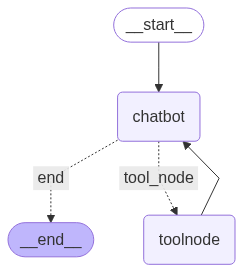

In [23]:
# define tool
search_tool = TavilySearch(
    max_result=5,
    search_depth="advanced",
)

# define model
llm = ChatOpenAI(
    model="gpt-4o",
    temperature=0
)
llm_with_tools = llm.bind_tools([search_tool])

# define state
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# define nodes
def chatbot_node(state: State):
    return {"messages" : [llm_with_tools.invoke(state["messages"])]}

class CustomToolNode:
    def __init__(self, tools:list)->None:
        self.tools_by_name = {tool.name:tool for tool in tools}
    
    def __call__(self, inputs:dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in current state")
        
        outputs = []
        for tool_call in message.tool_calls:
            # execute tool call
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            
            # create ToolMessage
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"]
                )
            )
        
        return {"messages" : outputs}

tool_node = CustomToolNode(tools=[tool])

# define routing function
def tool_or_end(state:State):
    if messages := state.get("messages", []) : ai_message = messages[-1]
    else : ValueError("No Message found in current state")

    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0 : return "tool_node"
    else : return "end"

# define graph builder
workflow = StateGraph(State)

# add nodes
workflow.add_node("chatbot", chatbot_node)
workflow.add_node("toolnode", tool_node)

# add edges
workflow.add_edge(START, "chatbot")
workflow.add_conditional_edges(
    "chatbot",
    tool_or_end,
    {
        "tool_node" : "toolnode",
        "end" : END
    }
)
workflow.add_edge("toolnode", "chatbot")

# compile graph
app = workflow.compile()

app

In [24]:
def stream_app(user_input:str)->None:
    for event in app.stream({"messages" : [HumanMessage(content=user_input)]}):
        for event_value in event.values():
            print("AI Response > ", event_value["messages"][-1].content)

In [26]:
while True:
    user_input = input("User Input > ")
    print("User Input > ", user_input)
    if user_input in ["quit", "exit", "q"]:
        print("AI Response > Good Bye!")
        break
    stream_app(user_input=user_input)

User Input >  안녕?
AI Response >  안녕하세요! 어떻게 도와드릴까요?
User Input >  선형대수에서 가우시안 소거법이 뭔지 조사해서 설명해줘
AI Response >  
AI Response >  {"query": "\uac00\uc6b0\uc2dc\uc548 \uc18c\uac70\ubc95 \uc124\uba85", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://datalabbit.tistory.com/28", "title": "[\ud589\ub82c\ub300\uc218\ud559] \uac00\uc6b0\uc2a4 \uc18c\uac70\ubc95(Gaussian Elimination)", "content": "\uac00\uc6b0\uc2a4 \uc18c\uac70\ubc95(Gaussian Elimination)\uc740 \ubbf8\uc9c0\uc218\uac00 n\uac1c\uc778 \uc5f0\ub9bd\uc77c\ucc28\ubc29\uc815\uc2dd\uc744 \ub098\ud0c0\ub0b4\ub294 \ud589\ub82c\uc5d0 \uae30\ubcf8 \ud589 \uc5f0\uc0b0(Elementary Row Operation)\uc744 \uc801\uc6a9\ud558\uc5ec \ud589 \uc0ac\ub2e4", "score": 0.8467682, "raw_content": null}, {"url": "https://blueberrypie.tistory.com/5", "title": "2. \uac00\uc6b0\uc2a4 \uc18c\uac70\ubc95\uc744 \uc774\uc6a9\ud55c \uc5f0\ub9bd\ubc29\uc815\uc2dd\uc758 \ud480\uc774", "content": "\uac00\uc6b0\uc2a4 \uc18c\uac70\